<a href="https://colab.research.google.com/github/DEASII/AI-KU65/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown
import pandas as pd

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qTJBS2Ulidl0EFVs7PiKZxq1ieo5lCJk' -O fastfood-comment.csv

In [35]:
data = pd.read_csv('fastfood-comment.csv')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [30]:
X,y = data.iloc[:, :-1], data.iloc[:, -1]

0      Normal
1        weak
2      Normal
3      Normal
4        weak
        ...  
134    Normal
135    Normal
136    Normal
137    Normal
138    Normal
Name: Diagnosis, Length: 139, dtype: object

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1, stratify = y)

In [39]:
model = DecisionTreeClassifier()
# model.fit(X_train, y_train)
X_encoded = pd.get_dummies(X, columns=['kidney diseases', 'Fasting Blood sugar', 'Uri infection', 'exercise habit', 'Frequency of alcohol consumption', 'Smoking habit', 'profession'])
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

,Age,#hours spent sitting per day,kidney diseases_no,kidney diseases_yes,Fasting Blood sugar_78,Fasting Blood sugar_79,Fasting Blood sugar_80,Fasting Blood sugar_81,Fasting Blood sugar_82,Fasting Blood sugar_85,...,Frequency of alcohol consumption_hardly ever or never,Frequency of alcohol consumption_once a week,Frequency of alcohol consumption_several times a day,Frequency of alcohol consumption_several times a week,Smoking habit_daily,Smoking habit_never,Smoking habit_occasional,profession_accountant,profession_engineer,profession_programmer
0,30,16,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,35,6,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,27,9,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,32,7,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,30,9,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,31,6,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
135,24,6,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
136,28,6,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
137,44,6,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [43]:
label_encoder = LabelEncoder()

# ทำ Label Encoding ในทุกคอลัมน์
df = data.apply(lambda col: label_encoder.fit_transform(col))
df

,Age,kidney diseases,Fasting Blood sugar,Uri infection,exercise habit,Frequency of alcohol consumption,Smoking habit,profession,#hours spent sitting per day,Diagnosis
0,5,0,2,1,2,2,2,1,11,0
1,10,1,25,1,0,2,0,1,4,1
2,2,1,17,0,2,1,1,1,7,0
3,7,0,15,1,2,1,1,1,5,0
4,5,1,24,0,0,2,1,1,7,1
...,...,...,...,...,...,...,...,...,...,...
134,6,0,10,0,2,4,0,1,4,0
135,1,0,6,0,2,4,0,1,4,0
136,3,0,11,0,2,4,0,1,4,0
137,12,1,9,0,2,4,0,1,4,0


In [45]:
X,y = df.iloc[:, :-1], df.iloc[:, -1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1, stratify = y)


In [99]:
model = DecisionTreeClassifier(
        ccp_alpha=0.001,
    criterion='gini',
    max_depth=5,
    # min_samples_split=5,
    # min_samples_leaf=5,
    max_features='sqrt',
    # splitter='random',
    # random_state=123
)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 1.00


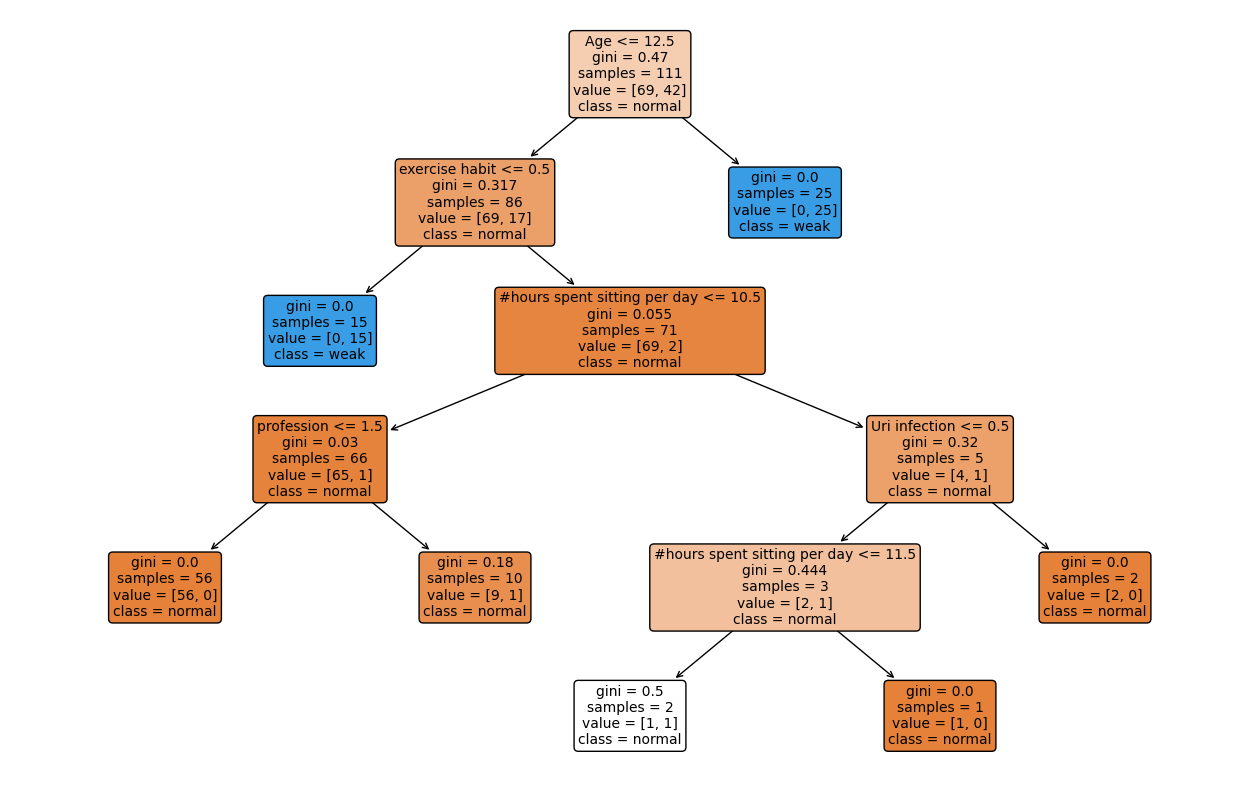

In [103]:
plt.figure(figsize=(16, 10))
# tree.plot_tree(model, feature_names=X_train.columns, class_names=df['Diagnosis'].unique(), filled=True)
tree.plot_tree(model, feature_names=X_train.columns, class_names=['normal', 'weak'],filled=True, rounded=True, fontsize=10)
plt.show()

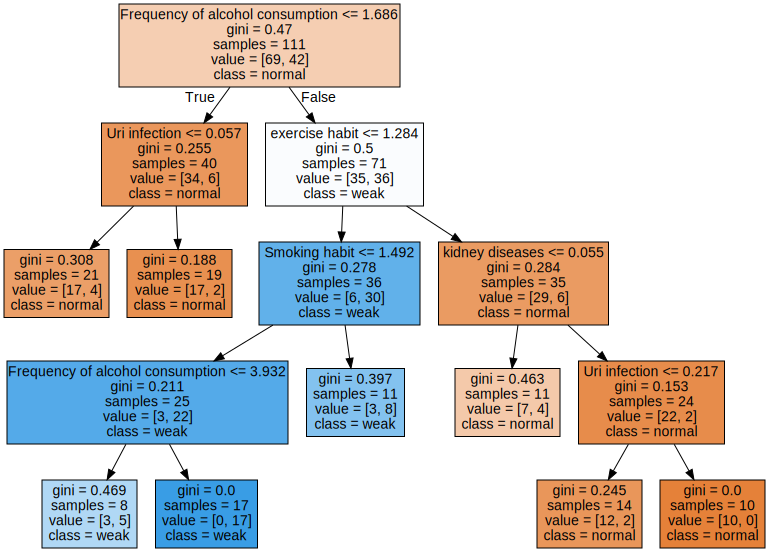

In [88]:
import graphviz
dot_data = tree.export_graphviz(model,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=['normal', 'weak'],
                                filled=True)

graphviz.Source(dot_data, format="png")